In [1]:
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [2]:
# Reading the dataset
map_data = pd.read_excel('Interview Challenge.xlsx')


In [3]:
# Displaying the data
map_data.head()

,id,latitudes/0,latitudes/1,latitudes/2,latitudes/3,longitudes/0,longitudes/1,longitudes/2,longitudes/3,latitudes/4,longitudes/4,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,7590cf21d1a446e3b07c92912a4a3c44,2.980511,2.980595,2.980763,2.980530,32.531686,32.531705,32.531327,32.531240,2.980515,32.531657,NaN,NaN,NaN,NaN,NaN
1,c7b3fde63650440abbaaecec33e30bfa,2.965254,2.965177,2.965122,2.966003,32.249756,32.250017,32.250278,32.250418,2.965983,32.249870,NaN,NaN,NaN,NaN,s
2,ef2b90b7ff804894a8413477cdfa0e86,2.961134,2.961096,2.961096,2.961162,32.240426,32.240401,32.240401,32.240312,2.960957,32.240535,NaN,NaN,NaN,NaN,NaN
3,604a8069c5bb4620b7394a7ec5603c18,2.961075,2.961193,2.960932,2.960932,32.240455,32.240537,32.240490,32.240490,2.961053,32.240440,NaN,NaN,NaN,NaN,NaN
4,9848201f11824ca5a7639aee61152122,2.960971,2.961101,2.961128,2.961035,32.240536,32.240386,32.240551,32.240573,2.960998,32.240462,NaN,NaN,NaN,NaN,NaN


In [16]:
# Understanding the data types for the various columns
map_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            5 non-null      object 
 1   latitudes/0   5 non-null      float64
 2   latitudes/1   5 non-null      float64
 3   latitudes/2   5 non-null      float64
 4   latitudes/3   5 non-null      float64
 5   longitudes/0  5 non-null      float64
 6   longitudes/1  5 non-null      float64
 7   longitudes/2  5 non-null      float64
 8   longitudes/3  5 non-null      float64
 9   latitudes/4   5 non-null      float64
 10  longitudes/4  5 non-null      float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
 14  Unnamed: 14   0 non-null      float64
 15  Unnamed: 15   1 non-null      object 
dtypes: float64(14), object(2)
memory usage: 768.0+ bytes


 ### Issues that need to be cleaned
 ###### It can be seen that the number of longitudes exceeds the number of latitudes
 ###### There are multiple unnamed columns which need to be excluded from the data set


In [6]:
### Removing the unnamed Columns, and excess longitudes

In [17]:
new_map_data = map_data[['id', 'latitudes/0', 'latitudes/1','latitudes/2', 'latitudes/3', 'longitudes/0', 'longitudes/1', 'longitudes/2', 'longitudes/3']]
new_map_data.head()

,id,latitudes/0,latitudes/1,latitudes/2,latitudes/3,longitudes/0,longitudes/1,longitudes/2,longitudes/3
0,7590cf21d1a446e3b07c92912a4a3c44,2.980511,2.980595,2.980763,2.980530,32.531686,32.531705,32.531327,32.531240
1,c7b3fde63650440abbaaecec33e30bfa,2.965254,2.965177,2.965122,2.966003,32.249756,32.250017,32.250278,32.250418
2,ef2b90b7ff804894a8413477cdfa0e86,2.961134,2.961096,2.961096,2.961162,32.240426,32.240401,32.240401,32.240312
3,604a8069c5bb4620b7394a7ec5603c18,2.961075,2.961193,2.960932,2.960932,32.240455,32.240537,32.240490,32.240490
4,9848201f11824ca5a7639aee61152122,2.960971,2.961101,2.961128,2.961035,32.240536,32.240386,32.240551,32.240573


In [18]:
# Renaming the Columns
new_map_data = new_map_data.rename(columns={'latitudes/0':'latitude_zero', 'latitudes/1':'latitude_one','latitudes/2':'latitude_two', 'latitudes/3':'latitude_three', 'longitudes/0':'longitude_zero', 'longitudes/1':'longitude_one', 'longitudes/2':'longitude_two', 'longitudes/3':'longitude_3'})

In [19]:
new_map_data.head(20)

,id,latitude_zero,latitude_one,latitude_two,latitude_three,longitude_zero,longitude_one,longitude_two,longitude_3
0,7590cf21d1a446e3b07c92912a4a3c44,2.980511,2.980595,2.980763,2.980530,32.531686,32.531705,32.531327,32.531240
1,c7b3fde63650440abbaaecec33e30bfa,2.965254,2.965177,2.965122,2.966003,32.249756,32.250017,32.250278,32.250418
2,ef2b90b7ff804894a8413477cdfa0e86,2.961134,2.961096,2.961096,2.961162,32.240426,32.240401,32.240401,32.240312
3,604a8069c5bb4620b7394a7ec5603c18,2.961075,2.961193,2.960932,2.960932,32.240455,32.240537,32.240490,32.240490
4,9848201f11824ca5a7639aee61152122,2.960971,2.961101,2.961128,2.961035,32.240536,32.240386,32.240551,32.240573


In [20]:
new_map_data.describe()

,latitude_zero,latitude_one,latitude_two,latitude_three,longitude_zero,longitude_one,longitude_two,longitude_3
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,2.965789,2.965833,2.965808,2.965932,32.300572,32.300609,32.300609,32.300607
std,0.008428,0.008437,0.008544,0.008439,0.129259,0.129253,0.129045,0.129000
min,2.960971,2.961096,2.960932,2.960932,32.240426,32.240386,32.240401,32.240312
25%,2.961075,2.961101,2.961096,2.961035,32.240455,32.240401,32.240490,32.240490
50%,2.961134,2.961193,2.961128,2.961162,32.240536,32.240537,32.240551,32.240573
75%,2.965254,2.965177,2.965122,2.966003,32.249756,32.250017,32.250278,32.250418
max,2.980511,2.980595,2.980763,2.980530,32.531686,32.531705,32.531327,32.531240


/home/ronald/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys


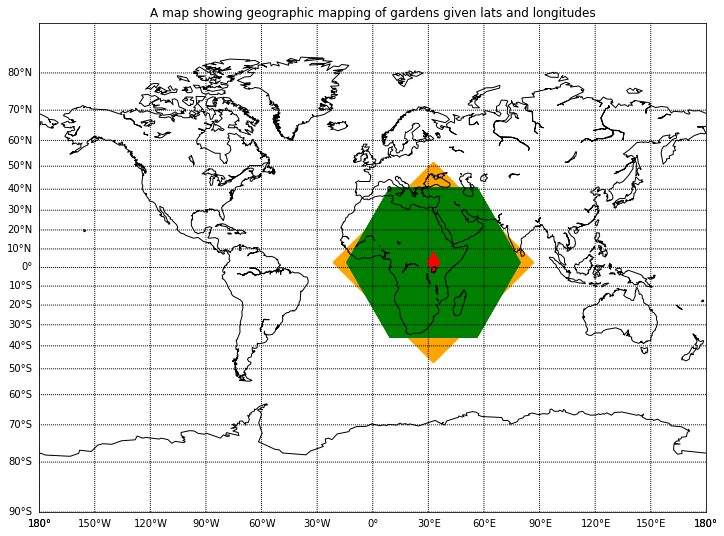

In [27]:
fig = plt.figure(figsize=(12,9))
cmap = Basemap(projection='mill', 
               llcrnrlat=-90,
               urcrnrlat=90, 
               llcrnrlon=-180, 
               urcrnrlon=180,
               resolution ='c')



cmap.drawcoastlines()
cmap.drawparallels(np.arange(-90,90,10), labels=[True, False,False, False])
cmap.drawmeridians(np.arange(-180,180,30), labels=[0,0,0,1])
#x = linspace(0, cmap.urcrnrx, new_map_data['latitude_zero'])
#y = linspace(0, cmap.urcrnry, new_map_data['longitude_zero'])

lats0 = new_map_data['latitude_zero'].values
lons0 = new_map_data['longitude_zero'].values
lats1 = new_map_data['latitude_one'].values
lons1 = new_map_data['longitude_one'].values
lats2 = new_map_data['latitude_two'].values
lons2 = new_map_data['longitude_two'].values
lats3 = new_map_data['latitude_three'].values
lons3 = new_map_data['longitude_3'].values
cmap.scatter(lons0,lats0,latlon=True, s=20000, color='orange', marker='D')
cmap.scatter(lons1,lats1,latlon=True, s=2000, color='blue', marker='*')
cmap.scatter(lons2,lats2,latlon=True, s=30000, color='green', marker='H')
cmap.scatter(lons3,lats3,latlon=True, s=200, color='red', marker='d')

plt.title('A map showing geographic mapping of gardens given lats and longitudes')
plt.show()



